In [376]:
#All the library imports that we needed for this project are included here.
from keras import models, layers, optimizers,regularizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import tensorflow as tf
#import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import skimage.io
from PIL import Image

In [8]:
#Loading the train and test csv data files as dataframes.
train_dataset = pd.read_csv('./dataset/train.csv')
test_dataset = pd.read_csv('./dataset/test.csv')

print("Length of training data is:", train_dataset.shape[0])
print("Length of testing data is:", test_dataset.shape[0])

#debug purpose.
#print("\nSummary of first 10 rows of train data:")
#train_dataset.head(10)

Length of training data is: 3662
Length of testing data is: 1928


In [9]:
#Splitting the training dataset into training and validation dataset.
#Approximately 30% is held out for validation and remaining 70% is used for training the models.
validation_dataset =train_dataset.iloc[:1200,:]
print("Validation set size:" ,validation_dataset.shape[0])

train_dataset = train_dataset.iloc[1200:,:]
print("Training set size:" ,train_dataset.shape[0])

#debug purpose.
#print(validation_dataset)
#debug purpose.
#print(train_dataset)

Validation set size: 1200
Training set size: 2462


In [10]:
#Split the training data & validation data each into 5 respective classes using the diagnosis variable from the training data.
class_train = []
class_val = []

for i in range(5):
    class_train.append(train_dataset[train_dataset['diagnosis'] == i]['id_code'].tolist())
    class_val.append(validation_dataset[validation_dataset['diagnosis'] == i]['id_code'].tolist())

#Concatenate .png extension at the end of each id to use this as a filename.
class_train = [[file_id + '.png' for file_id in class_n] for class_n in class_train]
class_val = [[file_id + '.png' for file_id in class_n] for class_n in class_val]

for i,class_n in enumerate(class_train):
    print("Length of training data in class",i,":", len(class_n))

print("")

for i,class_n in enumerate(class_val):
    print("Length of validation data in class",i,":", len(class_n))

Length of training data in class 0 : 1249
Length of training data in class 1 : 244
Length of training data in class 2 : 641
Length of training data in class 3 : 126
Length of training data in class 4 : 202

Length of validation data in class 0 : 556
Length of validation data in class 1 : 126
Length of validation data in class 2 : 358
Length of validation data in class 3 : 67
Length of validation data in class 4 : 93


In [11]:
#Original path to images directory.
train_dataset_dir = './dataset/train_images/'
test_dataset_dir = './dataset/test_images/'

#New directory for later use.
new_dataset_dir = './new_dataset/'

train_dir = os.path.join(new_dataset_dir, 'train')
#Create new directories for the labelled training data we have.
for i in range(5):
    new_folder = os.path.join(train_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#Create a copy of our training images to the new directories.
for i in range(5):
    for file_id in class_train[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(train_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

val_dir= os.path.join(new_dataset_dir, 'val')
#Create new directories for the labelled validation data we have.
for i in range(5):
    new_folder = os.path.join(val_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#Create a copy of our validation images to the new directories.
for i in range(5):
    for file_id in class_val[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(val_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

Class: [0] Height: 1050 Width: 1050
Class: [1] Height: 1958 Width: 2588
Class: [2] Height: 1226 Width: 1844
Class: [3] Height: 1944 Width: 2896
Class: [4] Height: 1958 Width: 2588


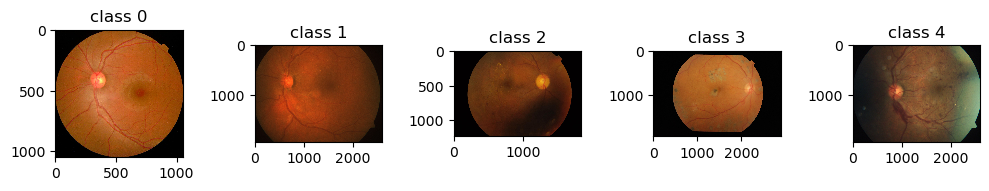

In [12]:
#Load the images into the workspace.
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#Displaying an example image for each class and their respective size.
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_path=folder_path+Image_Id
    image = skimage.io.imread(Image_path)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])

In [13]:
#Since the image sizes vary, we are resizing these so that all the images have uniform size before feeding those to the models.
print("Resizing images:")
train_folder = './new_dataset/train/'
val_folder = './new_dataset/val/'
test_folder = './dataset/test_images/'
w = 200
h = 200

#Resizing training data images.
print("Resizing all training data images")
for i in range(5):
    folder_path = os.path.join(train_folder, 'class' + str(i)+"/")
    #print("Resizing class",str(i),"training images")
    for j in os.listdir(folder_path):
        file = f"{folder_path}\\{j}"
        im = Image.open(file)
        im = im.resize((w, h), Image.LANCZOS)
        im.save(file)
    #print("Done resizing class",str(i),"training images")
print("Done resizing all training data images")

#Resizing validation data images.
print("Resizing all validation data images")
for i in range(5):
    folder_path = os.path.join(val_folder, 'class' + str(i)+"/")
    #print("Resizing class",str(i),"validation images")
    for j in os.listdir(folder_path):
        file = f"{folder_path}\\{j}"
        im = Image.open(file)
        im = im.resize((w, h), Image.LANCZOS)
        im.save(file)
    #print("Done resizing class",str(i),"validation images")
print("Done resizing all validation data images")

#Resizing test data images.
print("Resizing all testing data images")
for j in os.listdir(test_folder):
    file = f"{test_folder}\\{j}"
    im = Image.open(file)
    im = im.resize((w, h), Image.LANCZOS)
    im.save(file)
print("Done resizing all testing data images")

Resizing images:
Resizing all training data images


C:\Users\giris\AppData\Local\Temp\ipykernel_1396\455601926.py:17: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all training data images
Resizing all validation data images


C:\Users\giris\AppData\Local\Temp\ipykernel_1396\455601926.py:30: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all validation data images
Resizing all testing data images


C:\Users\giris\AppData\Local\Temp\ipykernel_1396\455601926.py:40: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((w, h), Image.LANCZOS)


Done resizing all testing data images


Class: [0] Height: 200 Width: 200
Class: [1] Height: 200 Width: 200
Class: [2] Height: 200 Width: 200
Class: [3] Height: 200 Width: 200
Class: [4] Height: 200 Width: 200


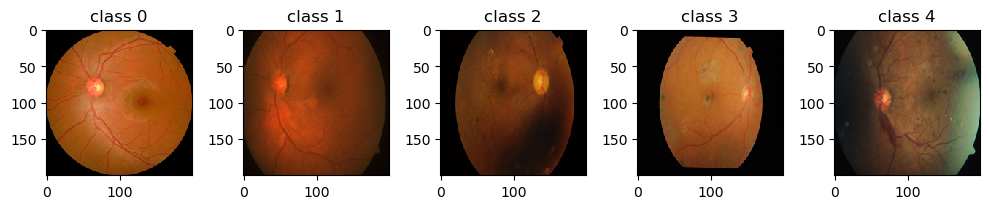

In [14]:
#Load the images into the workspace.
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#Displaying the same examples after resizing. 
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_path=folder_path+Image_Id
    image = skimage.io.imread(Image_path)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])

In [15]:
#Image Augmentation.
datatype = ['train','val']
class_aug = [1,3,4]

for data in datatype:
    for i in class_aug:
        image_dir = './new_dataset/' + str(data) + '/class' + str(i)

        #Iterating through all the images in the directory to generate augmented images.
        for filename in os.listdir(image_dir):
            img = load_img(os.path.join(image_dir, filename))
            img_90 = img.rotate(90)
            img_90.save(os.path.join(image_dir, 'aug_90_' + filename))
            
            img_180 = img.rotate(180)
            img_180.save(os.path.join(image_dir, 'aug_180_' + filename))
            
            img_270 = img.rotate(270)
            img_270.save(os.path.join(image_dir, 'aug_270_' + filename))

In [363]:
#preprocess data using ImageDataGenerator

#with data augmentation on training data:
'''
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,                               
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')'''

train_datagen_aug= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.1, horizontal_flip= True)
                                 

#without data augmentation:

#Normalize the pixels in range [0,255] to range [0,1] using rescale = 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)


In [364]:
train_dir = './new_dataset/train/'
val_dir = './new_dataset/val/'
test_dir = './dataset/test_images/'

#Train generator and validation generator will be used as parameters when fitting the model using model.fit
#Use target_size = (128,128) to increase the resolution of all the images by increasing the size to help mitigate overfitting
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir, #image folder
    target_size=(128,128),
    batch_size=50, #was 20 before
    class_mode='categorical')

train_generator = train_datagen.flow_from_directory(
    train_dir, #image folder
    target_size=(128,128),
    batch_size=50, #was 20 before
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=50, #was 20 before
    class_mode='categorical')

'''test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20, #was 20 before
    class_mode='categorical')'''


step_size_train_aug=train_generator_aug.n//train_generator_aug.batch_size


Found 4178 images belonging to 5 classes.
Found 4178 images belonging to 5 classes.
Found 2058 images belonging to 5 classes.


In [148]:
#############Custom CNN Model#######################

#Build model with convolution layers, pooling, batch normalization, and various regularization techniques

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(128,128,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal'))
model.add(layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
print(model.summary())




Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_238 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 conv2d_239 (Conv2D)         (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_118 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_111 (Ba  (None, 62, 62, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_141 (Dropout)       (None, 62, 62, 32)        0         
                                                                 
 conv2d_240 (Conv2D)         (None, 60, 60, 64)      

In [149]:

def f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

#Compile the model using optimizer and loss function
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

#save model
#model.save('blindness_detection.h5')

In [94]:
#fit model
step_size_train=train_generator.n//train_generator.batch_size
step_size_valid=validation_generator.n//validation_generator.batch_size


history = model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 13s 143ms/step - loss: 5.1171 - precision_18: 0.6343 - recall_18: 0.3113 - f1: 0.4143 - auc_18: 0.7796 - acc: 0.4889 - val_loss: 4.7549 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_f1: 0.0000e+00 - val_auc_18: 0.4865 - val_acc: 0.2029
Epoch 2/20
83/83 [==============================] - 11s 135ms/step - loss: 3.4143 - precision_18: 0.7348 - recall_18: 0.4208 - f1: 0.5326 - auc_18: 0.8599 - acc: 0.5819 - val_loss: 3.7281 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_f1: 0.0000e+00 - val_auc_18: 0.4718 - val_acc: 0.1405
Epoch 3/20
83/83 [==============================] - 11s 134ms/step - loss: 2.3443 - precision_18: 0.7577 - recall_18: 0.4448 - f1: 0.5588 - auc_18: 0.8805 - acc: 0.6126 - val_loss: 3.0154 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_f1: 0.0000e+00 - val_auc_18: 0.4768 - val_acc: 0.1220
Epoch 4/20
83/83 [==============================] - 11s 137ms/step - loss: 1.74

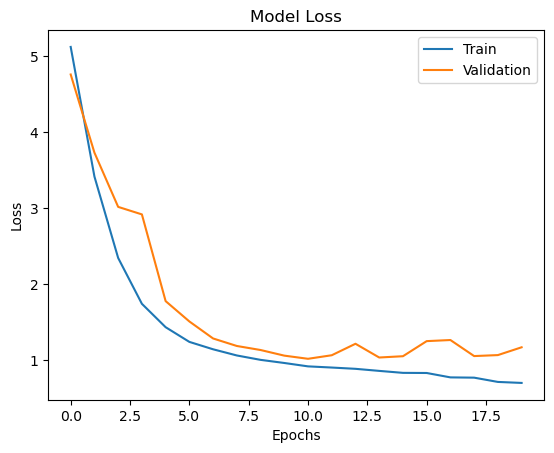

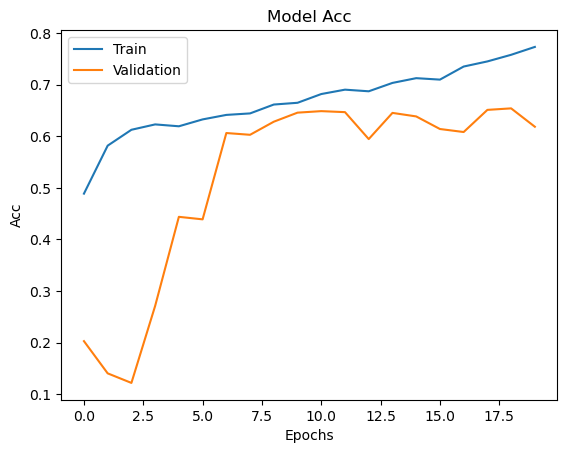

In [95]:
#Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [152]:
for i in history.history:
    #For each metric recorded, print the value after each epoch
    #print(i,history.history[i])
    
    #Print the average value for each metric or should I take the values at the final epoch????
    print("The average",i,"is", sum(history.history[i])/len(history.history[i]))

The average loss is 1.383911657333374
The average precision_18 is 0.7788377851247787
The average recall_18 is 0.537726429104805
The average f1 is 0.6320883587002755
The average auc_18 is 0.9094040632247925
The average acc is 0.6684154853224754
The average val_loss is 1.6788931012153625
The average val_precision_18 is 0.5913663491606712
The average val_recall_18 is 0.36763415071181954
The average val_f1 is 0.43252182016149165
The average val_auc_18 is 0.7930180042982101
The average val_acc is 0.5211707293987274


In [338]:
#############VGG16 Model#######################
#Instantiating the VGG16 conv base
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
conv_base.trainable = False

#add the loaded model as a layer and added additional layers
conv_base_model = models.Sequential()
conv_base_model.add(conv_base)
conv_base_model.add(layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal'))
conv_base_model.add(layers.MaxPooling2D((2,2)))
conv_base_model.add(layers.BatchNormalization())
conv_base_model.add(layers.Flatten())
conv_base_model.add(layers.Dense(32, activation='relu'))          
conv_base_model.add(layers.Dense(5, activation='softmax'))
print(conv_base_model.summary())



Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_284 (Conv2D)         (None, 2, 2, 16)          73744     
                                                                 
 max_pooling2d_185 (MaxPooli  (None, 1, 1, 16)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_256 (Ba  (None, 1, 1, 16)         64        
 tchNormalization)                                               
                                                                 
 flatten_92 (Flatten)        (None, 16)                0         
                                                                 
 dense_307 (Dense)           (None, 32)             

In [339]:
#Compile the model using optimizer and loss function
conv_base_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])


In [180]:
vgg_history = conv_base_model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/10
83/83 [==============================] - 13s 142ms/step - loss: 1.0646 - precision_36: 0.8372 - recall_36: 0.3413 - f1: 0.4718 - auc_36: 0.8666 - acc: 0.5976 - val_loss: 1.5715 - val_precision_36: 0.4586 - val_recall_36: 0.2971 - val_f1: 0.3586 - val_auc_36: 0.7363 - val_acc: 0.3668
Epoch 2/10
83/83 [==============================] - 11s 135ms/step - loss: 0.8306 - precision_36: 0.8081 - recall_36: 0.5233 - f1: 0.6343 - auc_36: 0.9173 - acc: 0.6829 - val_loss: 1.4100 - val_precision_36: 0.4834 - val_recall_36: 0.4249 - val_f1: 0.4522 - val_auc_36: 0.8137 - val_acc: 0.4532
Epoch 3/10
83/83 [==============================] - 11s 135ms/step - loss: 0.7424 - precision_36: 0.8075 - recall_36: 0.5986 - f1: 0.6867 - auc_36: 0.9322 - acc: 0.7151 - val_loss: 1.0912 - val_precision_36: 0.7005 - val_recall_36: 0.3834 - val_f1: 0.4939 - val_auc_36: 0.8458 - val_acc: 0.5434
Epoch 4/10
83/83 [==============================] - 11s 135ms/step - loss: 0.6892 - precision_36: 0.8070 - recall_3

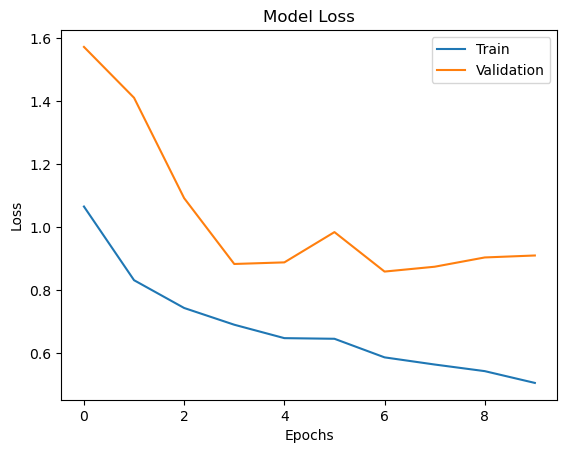

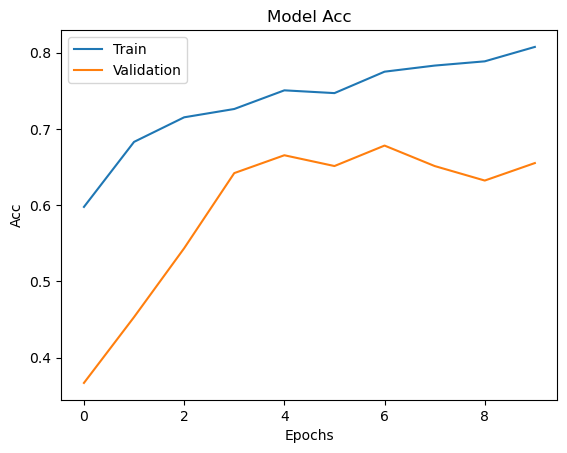

In [181]:
#Plot training and validation loss
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(vgg_history.history['acc'])
plt.plot(vgg_history.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [ ]:
for i in history.history:
    #For each metric recorded, print the value after each epoch
    #print(i,history.history[i])
    
    #Print the average value for each metric
    print("The average",i,"is", sum(history.history[i])/len(history.history[i]))

In [366]:
#############ResNet50 Model#######################
#Instantiating the Resnet50 conv base
resnet_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
resnet_base.trainable = False

#add the loaded model as a layer and added additional layers
resnet_base_model = models.Sequential()
resnet_base_model.add(resnet_base)
resnet_base_model.add(layers.BatchNormalization())
resnet_base_model.add(layers.Flatten())
resnet_base_model.add(layers.BatchNormalization())
resnet_base_model.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
resnet_base_model.add(layers.BatchNormalization())
resnet_base_model.add(layers.Dense(32, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
resnet_base_model.add(layers.Dropout(0.2))
resnet_base_model.add(layers.Dense(5, activation='softmax'))
print(resnet_base_model.summary())
                      
                      

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 batch_normalization_263 (Ba  (None, 4, 4, 2048)       8192      
 tchNormalization)                                               
                                                                 
 flatten_95 (Flatten)        (None, 32768)             0         
                                                                 
 batch_normalization_264 (Ba  (None, 32768)            131072    
 tchNormalization)                                               
                                                                 
 dense_315 (Dense)           (None, 64)                2097216   
                                                                 
 batch_normalization_265 (Ba  (None, 64)            

In [367]:
#Compile the model using optimizer and loss function
resnet_base_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [307]:
resnet_history = resnet_base_model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 17s 154ms/step - loss: 2.0619 - precision_61: 0.6820 - recall_61: 0.3958 - f1: 0.4958 - auc_61: 0.8285 - acc: 0.5448 - val_loss: 2.2322 - val_precision_61: 0.0000e+00 - val_recall_61: 0.0000e+00 - val_f1: 0.0000e+00 - val_auc_61: 0.5691 - val_acc: 0.1337
Epoch 2/20
83/83 [==============================] - 12s 139ms/step - loss: 1.5259 - precision_61: 0.7451 - recall_61: 0.4646 - f1: 0.5720 - auc_61: 0.8817 - acc: 0.6158 - val_loss: 2.0581 - val_precision_61: 1.0000 - val_recall_61: 9.7561e-04 - val_f1: 0.0019 - val_auc_61: 0.6727 - val_acc: 0.3541
Epoch 3/20
83/83 [==============================] - 12s 140ms/step - loss: 1.3696 - precision_61: 0.7724 - recall_61: 0.4908 - f1: 0.5984 - auc_61: 0.8949 - acc: 0.6381 - val_loss: 1.8924 - val_precision_61: 1.0000 - val_recall_61: 0.0020 - val_f1: 0.0038 - val_auc_61: 0.7269 - val_acc: 0.3390
Epoch 4/20
83/83 [==============================] - 12s 140ms/step - loss: 1.2506 - precision_61: 0

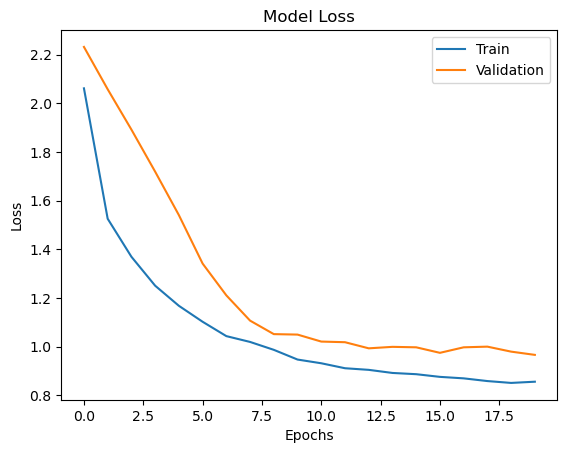

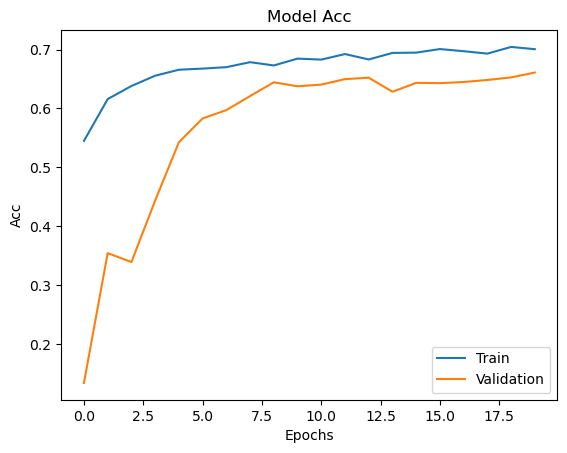

In [308]:
#Plot training and validation loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [373]:
##############IGNORE#################
resnet_history_aug = resnet_base_model.fit(
    train_generator_aug,
    steps_per_epoch=step_size_train_aug,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 23s 277ms/step - loss: 1.1011 - precision_71: 0.7039 - recall_71: 0.4775 - f1: 0.5684 - auc_71: 0.8825 - acc: 0.6153 - val_loss: 1.0693 - val_precision_71: 0.7351 - val_recall_71: 0.5117 - val_f1: 0.6023 - val_auc_71: 0.8941 - val_acc: 0.6400
Epoch 2/20
83/83 [==============================] - 23s 277ms/step - loss: 0.9901 - precision_71: 0.7657 - recall_71: 0.5065 - f1: 0.6084 - auc_71: 0.9036 - acc: 0.6490 - val_loss: 1.0283 - val_precision_71: 0.7311 - val_recall_71: 0.5185 - val_f1: 0.6058 - val_auc_71: 0.8950 - val_acc: 0.6302
Epoch 3/20
83/83 [==============================] - 23s 273ms/step - loss: 0.9883 - precision_71: 0.7575 - recall_71: 0.4988 - f1: 0.6007 - auc_71: 0.9031 - acc: 0.6492 - val_loss: 1.0413 - val_precision_71: 0.7330 - val_recall_71: 0.5156 - val_f1: 0.6045 - val_auc_71: 0.8976 - val_acc: 0.6351
Epoch 4/20
83/83 [==============================] - 22s 271ms/step - loss: 0.9719 - precision_71: 0.7643 - recall_7

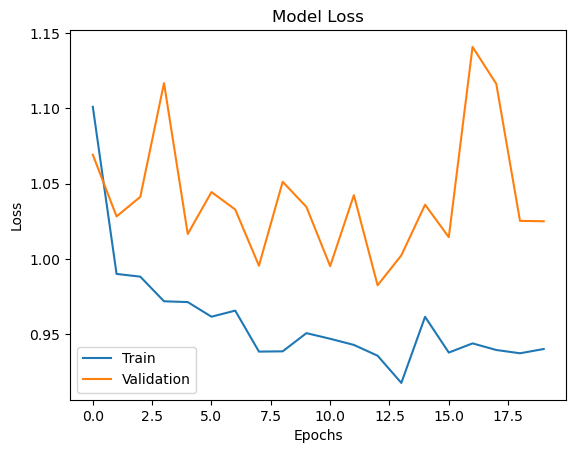

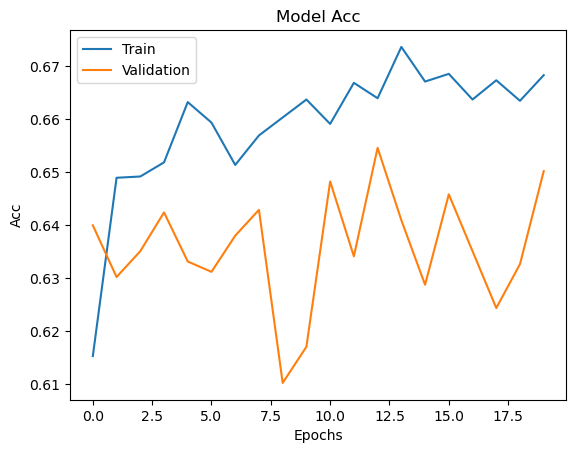

In [374]:
#####################IGNORE####################

#Plot training and validation loss
plt.plot(resnet_history_aug.history['loss'])
plt.plot(resnet_history_aug.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(resnet_history_aug.history['acc'])
plt.plot(resnet_history_aug.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [395]:
#############InceptionV3 Model#######################
#Instantiating the InceptionV3 conv base
inception_base = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3))


#freeze the loaded model so as to avoid destroying any of the information they contain during future training rounds
inception_base.trainable = False

#add the loaded model as a layer and added additional layers
inception_base_model = models.Sequential()
inception_base_model.add(inception_base)
inception_base_model.add(layers.BatchNormalization())
#inception_base_model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'))
#inception_base_model.add(layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal'))
#inception_base_model.add(layers.Conv2D(8, (3,3), activation='relu', kernel_initializer='he_normal'))
inception_base_model.add(layers.GlobalAveragePooling2D())
inception_base_model.add(layers.Dropout(0.4))
inception_base_model.add(layers.Flatten())
inception_base_model.add(layers.BatchNormalization())
inception_base_model.add(layers.Dense(64, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
inception_base_model.add(layers.BatchNormalization())
inception_base_model.add(layers.Dense(32, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(l=0.01))) 
inception_base_model.add(layers.Dropout(0.2))
inception_base_model.add(layers.Dense(5, activation='softmax'))
print(inception_base_model.summary())
                      
                      

Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 batch_normalization_1124 (B  (None, 2, 2, 2048)       8192      
 atchNormalization)                                              
                                                                 
 global_average_pooling2d_10  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_203 (Dropout)       (None, 2048)              0         
                                                                 
 flatten_100 (Flatten)       (None, 2048)              0         
                                                                 
 batch_normalization_1125 (B  (None, 2048)          

In [396]:
#Compile the model using optimizer and loss function
inception_base_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        f1,
                        tf.keras.metrics.AUC(),
                        'acc'])

In [397]:
inception_history2 = inception_base_model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=step_size_valid)

Epoch 1/20
83/83 [==============================] - 18s 161ms/step - loss: 3.0817 - precision_76: 0.6208 - recall_76: 0.3939 - f1: 0.4786 - auc_76: 0.8040 - acc: 0.5104 - val_loss: 2.6925 - val_precision_76: 0.7237 - val_recall_76: 0.4127 - val_f1: 0.5239 - val_auc_76: 0.8575 - val_acc: 0.5790
Epoch 2/20
83/83 [==============================] - 11s 139ms/step - loss: 2.4040 - precision_76: 0.7438 - recall_76: 0.5056 - f1: 0.6005 - auc_76: 0.8905 - acc: 0.6277 - val_loss: 2.2516 - val_precision_76: 0.7519 - val_recall_76: 0.4893 - val_f1: 0.5911 - val_auc_76: 0.8860 - val_acc: 0.6205
Epoch 3/20
83/83 [==============================] - 12s 140ms/step - loss: 2.0000 - precision_76: 0.7681 - recall_76: 0.5455 - f1: 0.6363 - auc_76: 0.9114 - acc: 0.6725 - val_loss: 1.9381 - val_precision_76: 0.7386 - val_recall_76: 0.5195 - val_f1: 0.6095 - val_auc_76: 0.8944 - val_acc: 0.6405
Epoch 4/20
83/83 [==============================] - 12s 141ms/step - loss: 1.7142 - precision_76: 0.7785 - recall_7

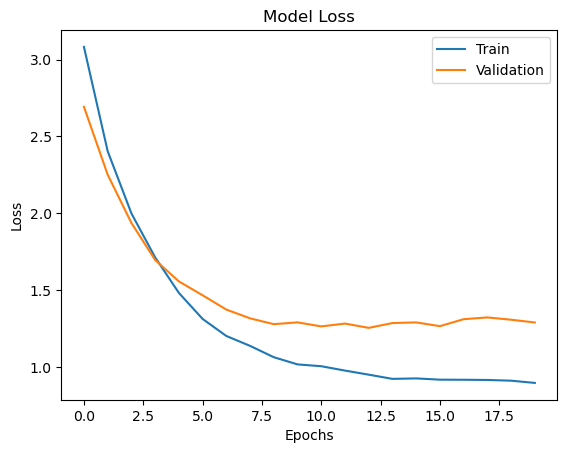

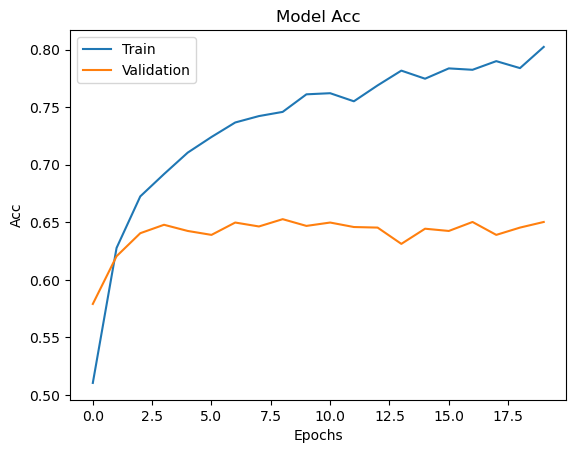

In [398]:
#Plot training and validation loss
plt.plot(inception_history2.history['loss'])
plt.plot(inception_history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()

#Plot training and validation accuracy
plt.plot(inception_history2.history['acc'])
plt.plot(inception_history2.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='best')
plt.show()